## Introduction to the Interstellar Medium
### Jonathan Williams

### Figures 5.6 and 5.7: Simple model of the Lyman alpha and CII cooling of an atomic cloud

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


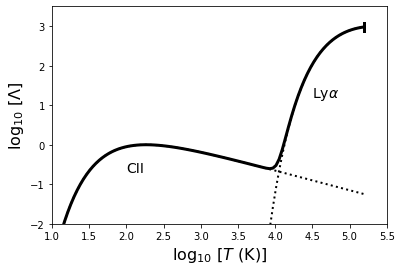

In [5]:
# Figure 5.6: relative cooling function of CII and Lyman alpha as a function of temperature

T1 = 92         # CII
T2 = 1.18e5     # Ly alpha
T3 = 1.58e5     # Ly continuum

nsteps = 100
lT_min = 1.0
lT_max = np.log10(T3)
lT = np.linspace(lT_min, lT_max, nsteps)
T = 10**lT

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("log$_{10}$ [$T$ (K)]", fontsize=16)
ax1.set_ylabel(r"log$_{10}$ [$\Lambda$]", fontsize=16)

# CII cooling
y1 = (T1/T)**0.5 / np.exp(T1/T)
norm = 1/y1.max()
y1 *= norm
ax1.plot(lT, np.log10(y1), 'k:', lw=2)
ax1.text(2.0,-0.7,'CII',fontsize=14)

# Lyman alpha cooling, schematically shown as 1000 times stronger than CII (peak to peak)
y2 = (T2/T)**0.5 / np.exp(T2/T)
y2 *= 1000 * norm
ax1.plot(lT, np.log10(y2), 'k:', lw=2)
#ax1.plot(lT_max, np.log10(y2[-1]),'ko')
ax1.plot([lT_max,lT_max], [np.log10(y2[-1])-0.1,np.log10(y2[-1])+0.1], 'k-', lw=3)
ax1.text(4.5,1.2,'Ly$\\alpha$',fontsize=14)

cooling = y1+y2
ax1.plot(lT, np.log10(cooling), 'k-', lw=3)
ax1.set_xlim(1,5.5)
ax1.set_ylim(-2,3.5)
plt.show()

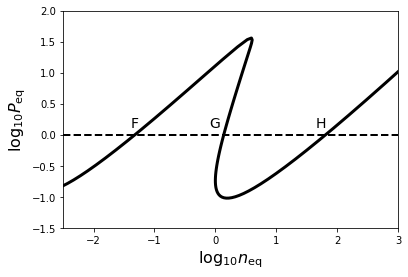

In [3]:
# now calculate the scale factor (proxy for density)
# that is required for the cooling to match a given heating rate

heating = 1.0
density = heating/cooling
pressure = density * T
pressure /= 1e3

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(111)
ax2.set_xlabel(r"log$_{10} n_{\rm eq}$", fontsize=16)
ax2.set_ylabel(r"log$_{10} P_{\rm eq}$", fontsize=16)

ldens = np.log10(density)
ax2.plot(ldens, np.log10(pressure), 'k-', lw=3)
ax2.set_xlim(-2.5,3)
ax2.set_ylim(-1.5,2.0)
ax2.plot([-2.5,3],[0,0], 'k--', lw=2)

#k = np.argsort((pressure-1)**2)
#ax2.plot(ldens[k[0]], 0,'ko')
#ax2.plot(ldens[k[1]], 0,'ko')
#ax2.plot(ldens[k[2]], 0,'ko')

# just label the three points manually
ax2.text(-1.4,0.12,'F',fontsize=14)
ax2.text(-0.1,0.12,'G',fontsize=14)
ax2.text(1.65,0.12,'H',fontsize=14)
plt.show()